# Notebook 10

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Exercise 10.1

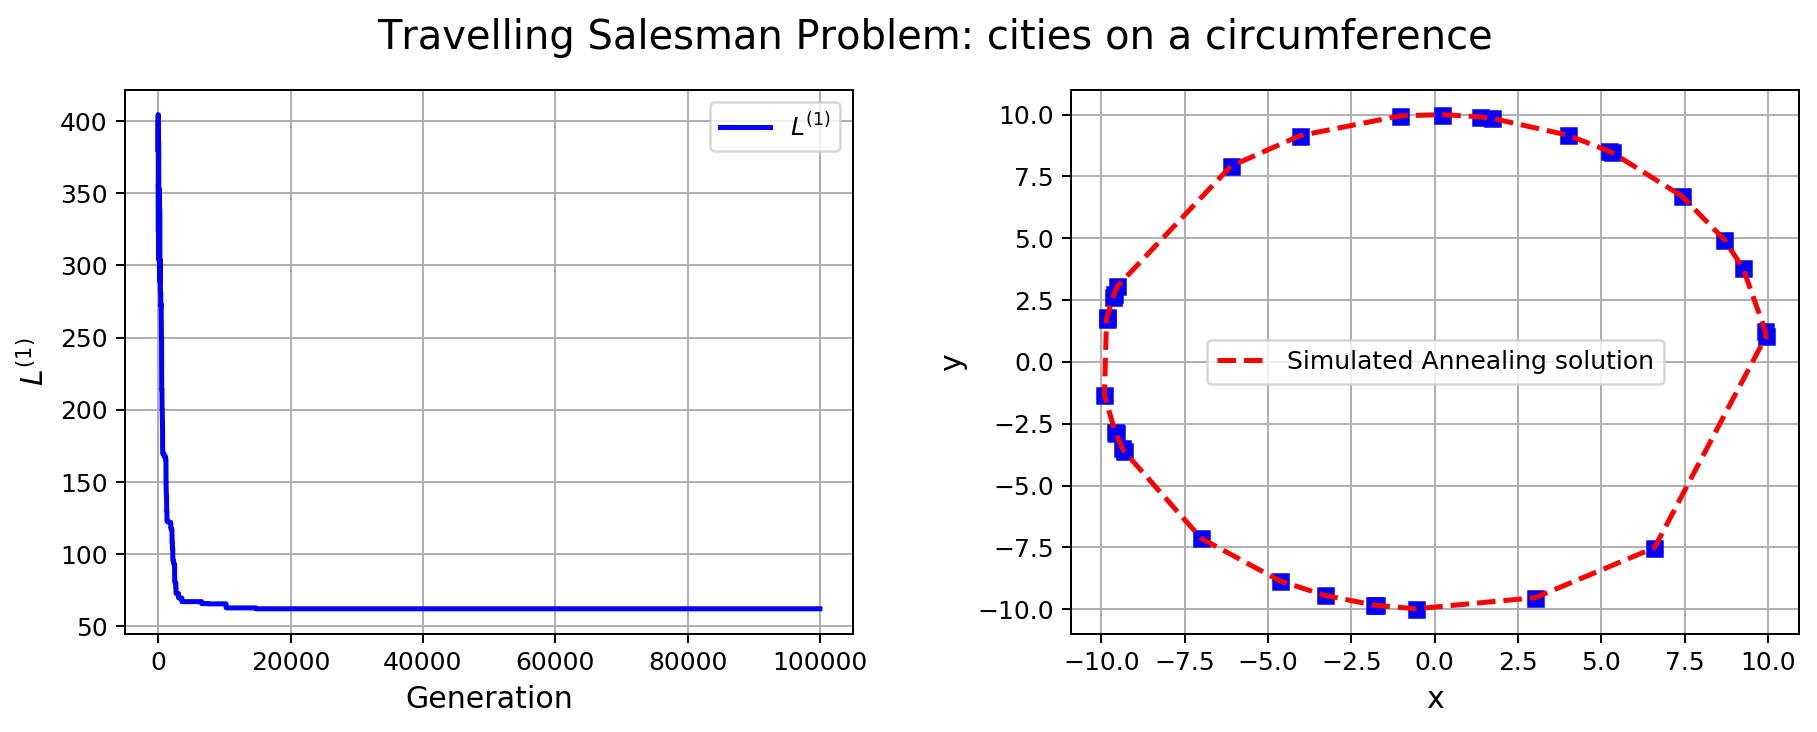

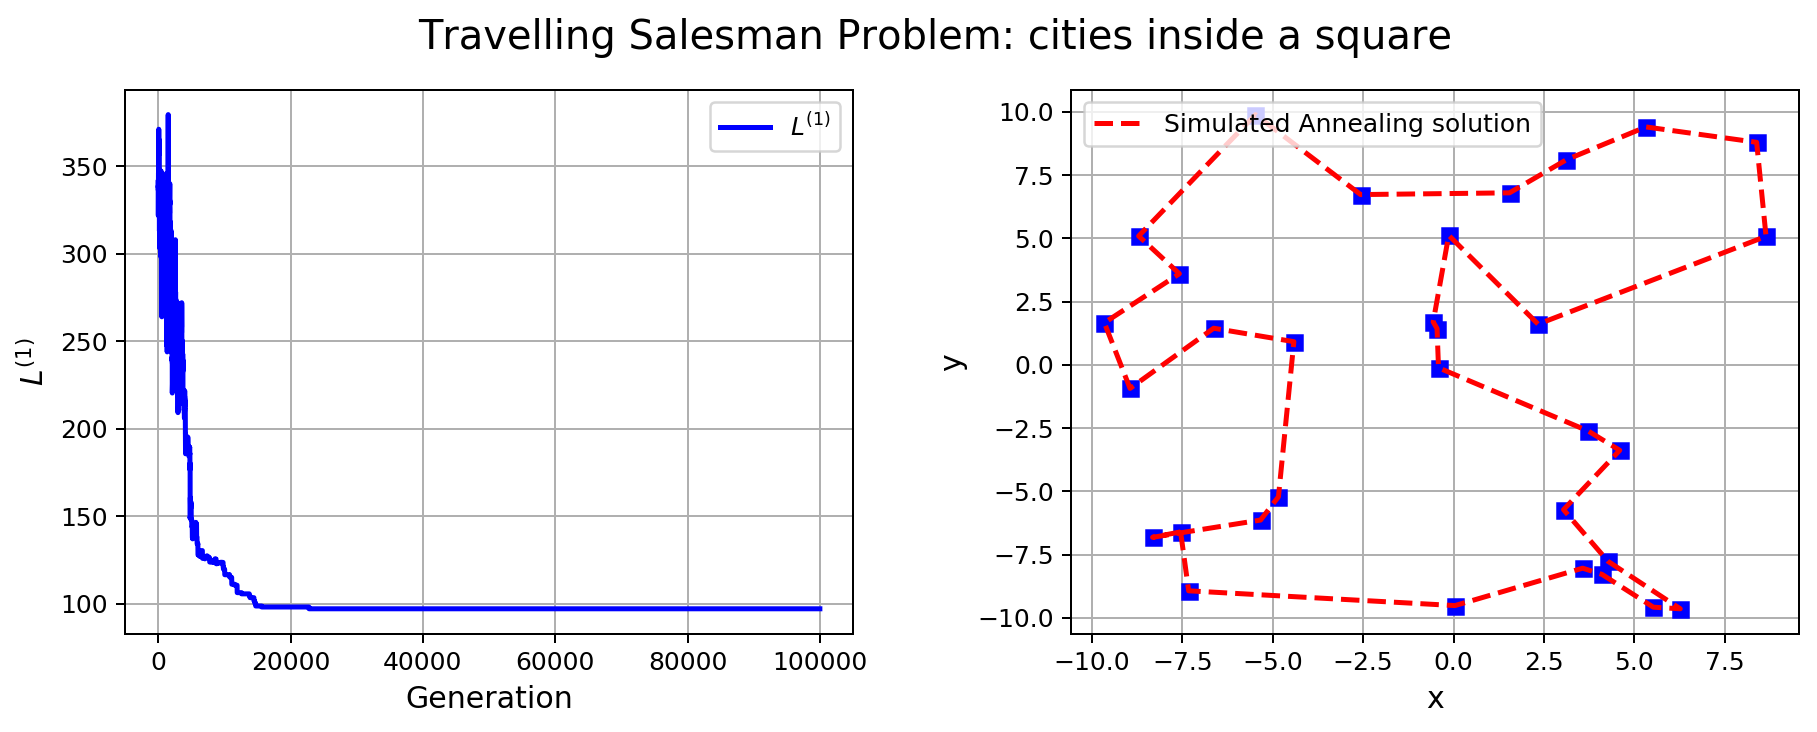

In [2]:
cities_configuration = np.loadtxt("circle_cities_config.txt").T
cities_configuration2 = np.loadtxt("square_cities_config.txt").T
circle_solution = np.loadtxt("circle_opt_tour.txt").T
square_solution = np.loadtxt("square_opt_tour.txt").T
optimal_lenght = np.loadtxt("circle_opt_length.txt").T
optimal_lenght2 = np.loadtxt("square_opt_length.txt").T

plt.figure(figsize=(12, 4), dpi=180)
plt.subplot(1, 2, 1);
plt.suptitle("Travelling Salesman Problem: cities on a circumference", size =16)
plt.plot(optimal_lenght[0], optimal_lenght[1], 'b-', lw = 2, label = '$L^{(1)}$')
plt.legend()
plt.grid(True)
plt.xlabel("Generation", size=12)
plt.ylabel("$L^{(1)}$", size=12)
plt.subplot(1, 2, 2)
plt.plot(cities_configuration[1], cities_configuration[2], 'bs', markersize = 6)
plt.plot(circle_solution[1], circle_solution[2], 'r--', lw=2, label = "Simulated Annealing solution")
plt.xlabel("x", size = 12)
plt.ylabel("y", size = 12)
plt.legend()
plt.grid(True)
plt.subplots_adjust(wspace = 0.3)
plt.show()

plt.figure(figsize=(12, 4), dpi=180)
plt.subplot(1, 2, 1);
plt.suptitle("Travelling Salesman Problem: cities inside a square", size =16)
plt.plot(optimal_lenght2[0], optimal_lenght2[1], 'b-', lw = 2, label = '$L^{(1)}$')
plt.legend()
plt.grid(True)
plt.xlabel("Generation", size=12)
plt.ylabel("$L^{(1)}$", size=12)
plt.subplot(1, 2, 2)
plt.plot(cities_configuration2[1], cities_configuration2[2], 'bs', markersize = 6)
plt.plot(square_solution[1], square_solution[2], 'r--', lw=2, label = "Simulated Annealing solution")
plt.xlabel("x", size = 12)
plt.ylabel("y", size = 12)
plt.legend()
plt.grid(True)
plt.subplots_adjust(wspace = 0.3)
plt.show()

### Algorithms comparison: 

|  | Circumference |  Square |
|:---:|:---:|:---:|
| Genetic Algorithm | 62.2256| 96.5096 |
| Simulated Annealing | 62.2256| 97.1986 |


## Exercise 10.2

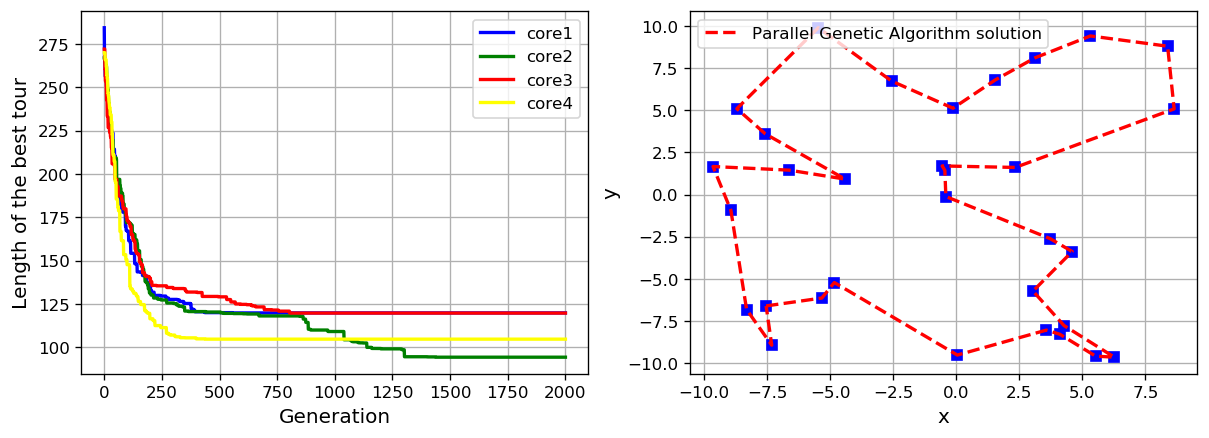

In [26]:
plt.figure(figsize = (12, 4), dpi=120)
plt.subplot(1, 2, 1);
colors = ['blue', 'green', 'red', 'yellow']
for i in range(4):
    core_length = np.loadtxt("Parallel_GA/core{}/optimal_length.0".format(i+1)).T
    plt.plot(core_length[0], core_length[1], color = colors[i], lw = 2, label = 'core{}'.format(i+1))

plt.xlabel("Generation", size=12)
plt.ylabel("Length of the best tour", size=12)
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2);
core_best_tour = np.loadtxt("Parallel_GA/core2/optimal_tour.0").T
plt.plot(cities_configuration2[1], cities_configuration2[2], 'bs', markersize = 6)
plt.plot(core_best_tour[1], core_best_tour[2], 'r--', lw=2, label = "Parallel Genetic Algorithm solution")
plt.xlabel("x", size = 12)
plt.ylabel("y", size = 12)
plt.legend()
plt.grid(True)
plt.show()

### Algorithms comparison: 

|  | Circumference |  Square |
|:---:|:---:|:---:|
|Parallel GA|  | 94.1844|
| Genetic Algorithm | 62.2256| 96.5096 |
| Simulated Annealing | 62.2256| 97.1986 |